In [3]:
# import psycopg2
# from psycopg2 import sql
import pandas as pd

# # Database connection parameters
# db_params = {
#     'dbname': 'postgres',  # Replace with your database name
#     'user': 'postgres',          # Replace with your username
#     'password': 'Kalika@1992',      # Replace with your password
#     'host': 'localhost',              # Replace with your host, e.g., localhost or an IP address
#     'port': '5432'                    # Default PostgreSQL port
# }

# # Connect to the PostgreSQL database
# try:
#     conn = psycopg2.connect(**db_params)
#     cursor = conn.cursor()

#     # Create table query
#     create_table_query = '''
#     CREATE TABLE IF NOT EXISTS kalika_catalog (
#         item_id SERIAL PRIMARY KEY,
#         main_category VARCHAR(255),
#         sub_categories VARCHAR(255),
#         item_code VARCHAR(50),
#         product_title VARCHAR(255),
#         product_description TEXT,
#         upc VARCHAR(50),
#         brand VARCHAR(100),
#         department VARCHAR(100),
#         type VARCHAR(100),
#         tag VARCHAR(100),
#         list_price NUMERIC(10, 2),
#         price NUMERIC(10, 2),
#         inventory INTEGER,
#         min_order_qty INTEGER,
#         available TEXT,
#         large_image TEXT,
#         additional_images TEXT,
#         item_properties TEXT
#     )
#     '''

#     # Execute the create table query
#     cursor.execute(create_table_query)

#     # Commit changes and close the connection
#     conn.commit()
#     print("Table 'kalika_catalog' created successfully.")

# except Exception as e:
#     print(f"An error occurred: {e}")
# finally:
#     if cursor:
#         cursor.close()
#     if conn:
#         conn.close()

In [6]:
df = pd.read_csv('V:/ML_projects/Kalika_projects1/Kalika_projects-main/data/kalika_catalog_products.csv',encoding='latin1')
print(df.dtypes)
df.to_csv('V:/ML_projects/Kalika_projects1/Kalika_projects-main/data/kalika_catalog_products.csv',encoding='utf-8')


Item Id                  int64
Main Category           object
Sub Categories          object
Item Code               object
Product Title           object
Product Description     object
UPC                     object
Brand                   object
Department             float64
Type                    object
Tag                    float64
List Price             float64
Price                  float64
Inventory              float64
Min Order Qty          float64
Available               object
Large Image             object
Additional Images      float64
Item Properties         object
dtype: object


In [11]:
sql_query="""ALTER TABLE kalika_catalog
# ALTER COLUMN available SET DATA TYPE text;"""

In [12]:
sql_query="""ALTER TABLE kalika_catalog
ALTER COLUMN inventory SET DATA TYPE NUMERIC(16, 2);"""

conn = psycopg2.connect(**db_params)
cur = conn.cursor()
cur.execute(sql_query)

# Commit the changes
conn.commit()

# # Close the cursor and connection
# conn.close()

In [13]:
import psycopg2
import os

# Database connection parameters
db_params = {
    'dbname': 'postgres',  # Replace with your database name
    'user': 'postgres',     # Replace with your username
    'password': 'Kalika@1992',  # Replace with your password
    'host': 'localhost',     # Replace with your host
    'port': '5432'           # Default PostgreSQL port
}

# Path to your CSV file
csv_file_path = 'V:/ML_projects/Kalika_projects/data/kalika_catalog_products.csv'  # Update with your actual file path

# Connect to the PostgreSQL database
try:
    conn = psycopg2.connect(**db_params)
    cursor = conn.cursor()

    # Ensure the CSV file exists before attempting to copy
    if not os.path.isfile(csv_file_path):
        raise FileNotFoundError(f"The file '{csv_file_path}' does not exist.")

    # Use \copy command via cursor.execute() with a string
    copy_query = f'''
    copy kalika_catalog(Item_Id, Main_Category, Sub_Categories, Item_Code,
                         Product_Title, Product_Description, UPC, Brand,
                         Department, Type, Tag, List_Price,
                         Price, Inventory, Min_Order_Qty,
                         Available, Large_Image, Additional_Images,
                         Item_Properties)
    FROM '{csv_file_path}'
    DELIMITER ','
    CSV HEADER;
    '''

    cursor.execute(copy_query)

    # Commit changes and close the connection
    conn.commit()
    print("Data imported successfully.")

except Exception as e:
    print(f"An error occurred: {e}")
finally:
    if cursor:
        cursor.close()
    if conn:
        conn.close()

An error occurred: extra data after last expected column
CONTEXT:  COPY kalika_catalog, line 2: "0,0,0,201624,Gloves,Gloves,N69PC-001-0026,COTTON GLOVES FOR EPOXY (PAIR),"Both side useable Gloves,M..."



In [75]:
# conn = psycopg2.connect(**db_params)
# cur = conn.cursor()
# # Open CSV file with error handling
# with open('kalika_catalog_products.csv', 'r', encoding='latin1', errors='replace') as f:
#     cur.copy_expert("COPY kalika_catalog FROM STDIN WITH CSV HEADER", f)


BadCopyFileFormat: extra data after last expected column
CONTEXT:  COPY kalika_catalog, line 418: "201877,Chisels,Chisels,N31-KENNEDYCHISEL12,CHISEL 12 INCH WITH BI-MATERIAL HAND GUARD,<div><p>CHISEL..."


In [1]:
import pandas as pd 

In [2]:
df=pd.read_csv("data/kalika_catalog_products.csv")

In [4]:
df.head(1)   

Unnamed: 0  Item Id Main Category Sub Categories       Item Code  \
0           0   201624        Gloves         Gloves  N69PC-001-0026   

                    Product Title  \
0  COTTON GLOVES FOR EPOXY (PAIR)   

                                 Product Description       UPC Brand  \
0  Both side useable Gloves,Made by grey 100% Cot...  2.02E+11   NaN   

   Department Type  Tag  List Price  Price  Inventory  Min Order Qty  \
0         NaN  NaN  NaN        25.0   25.0      100.0           50.0   

  Available                       Large Image  Additional Images  \
0       YES  COTTON_GLOVES_FOR_EPOXY_PAIR.jpg                NaN   

                                     Item Properties  
0  Lead_Time - 7, length - 9 inch, Material_Type ...

In [3]:
# df[~df['Additional Images'].isna()]
df['Large Image']=df['Large Image'].apply(lambda x:x.replace('/20190501314/assets/items/largeimages/',''))


In [60]:
from PIL import Image  
s=df['Large Image'][0]
# d=r'V:/ML_projects/Kalika_projects1/Kalika_projects-main'+s
# Read image
# print()
# d
# img = Image.open(s)


In [61]:
pwd

'V:\\ML_projects\\Kalika_projects1\\Kalika_projects-main'

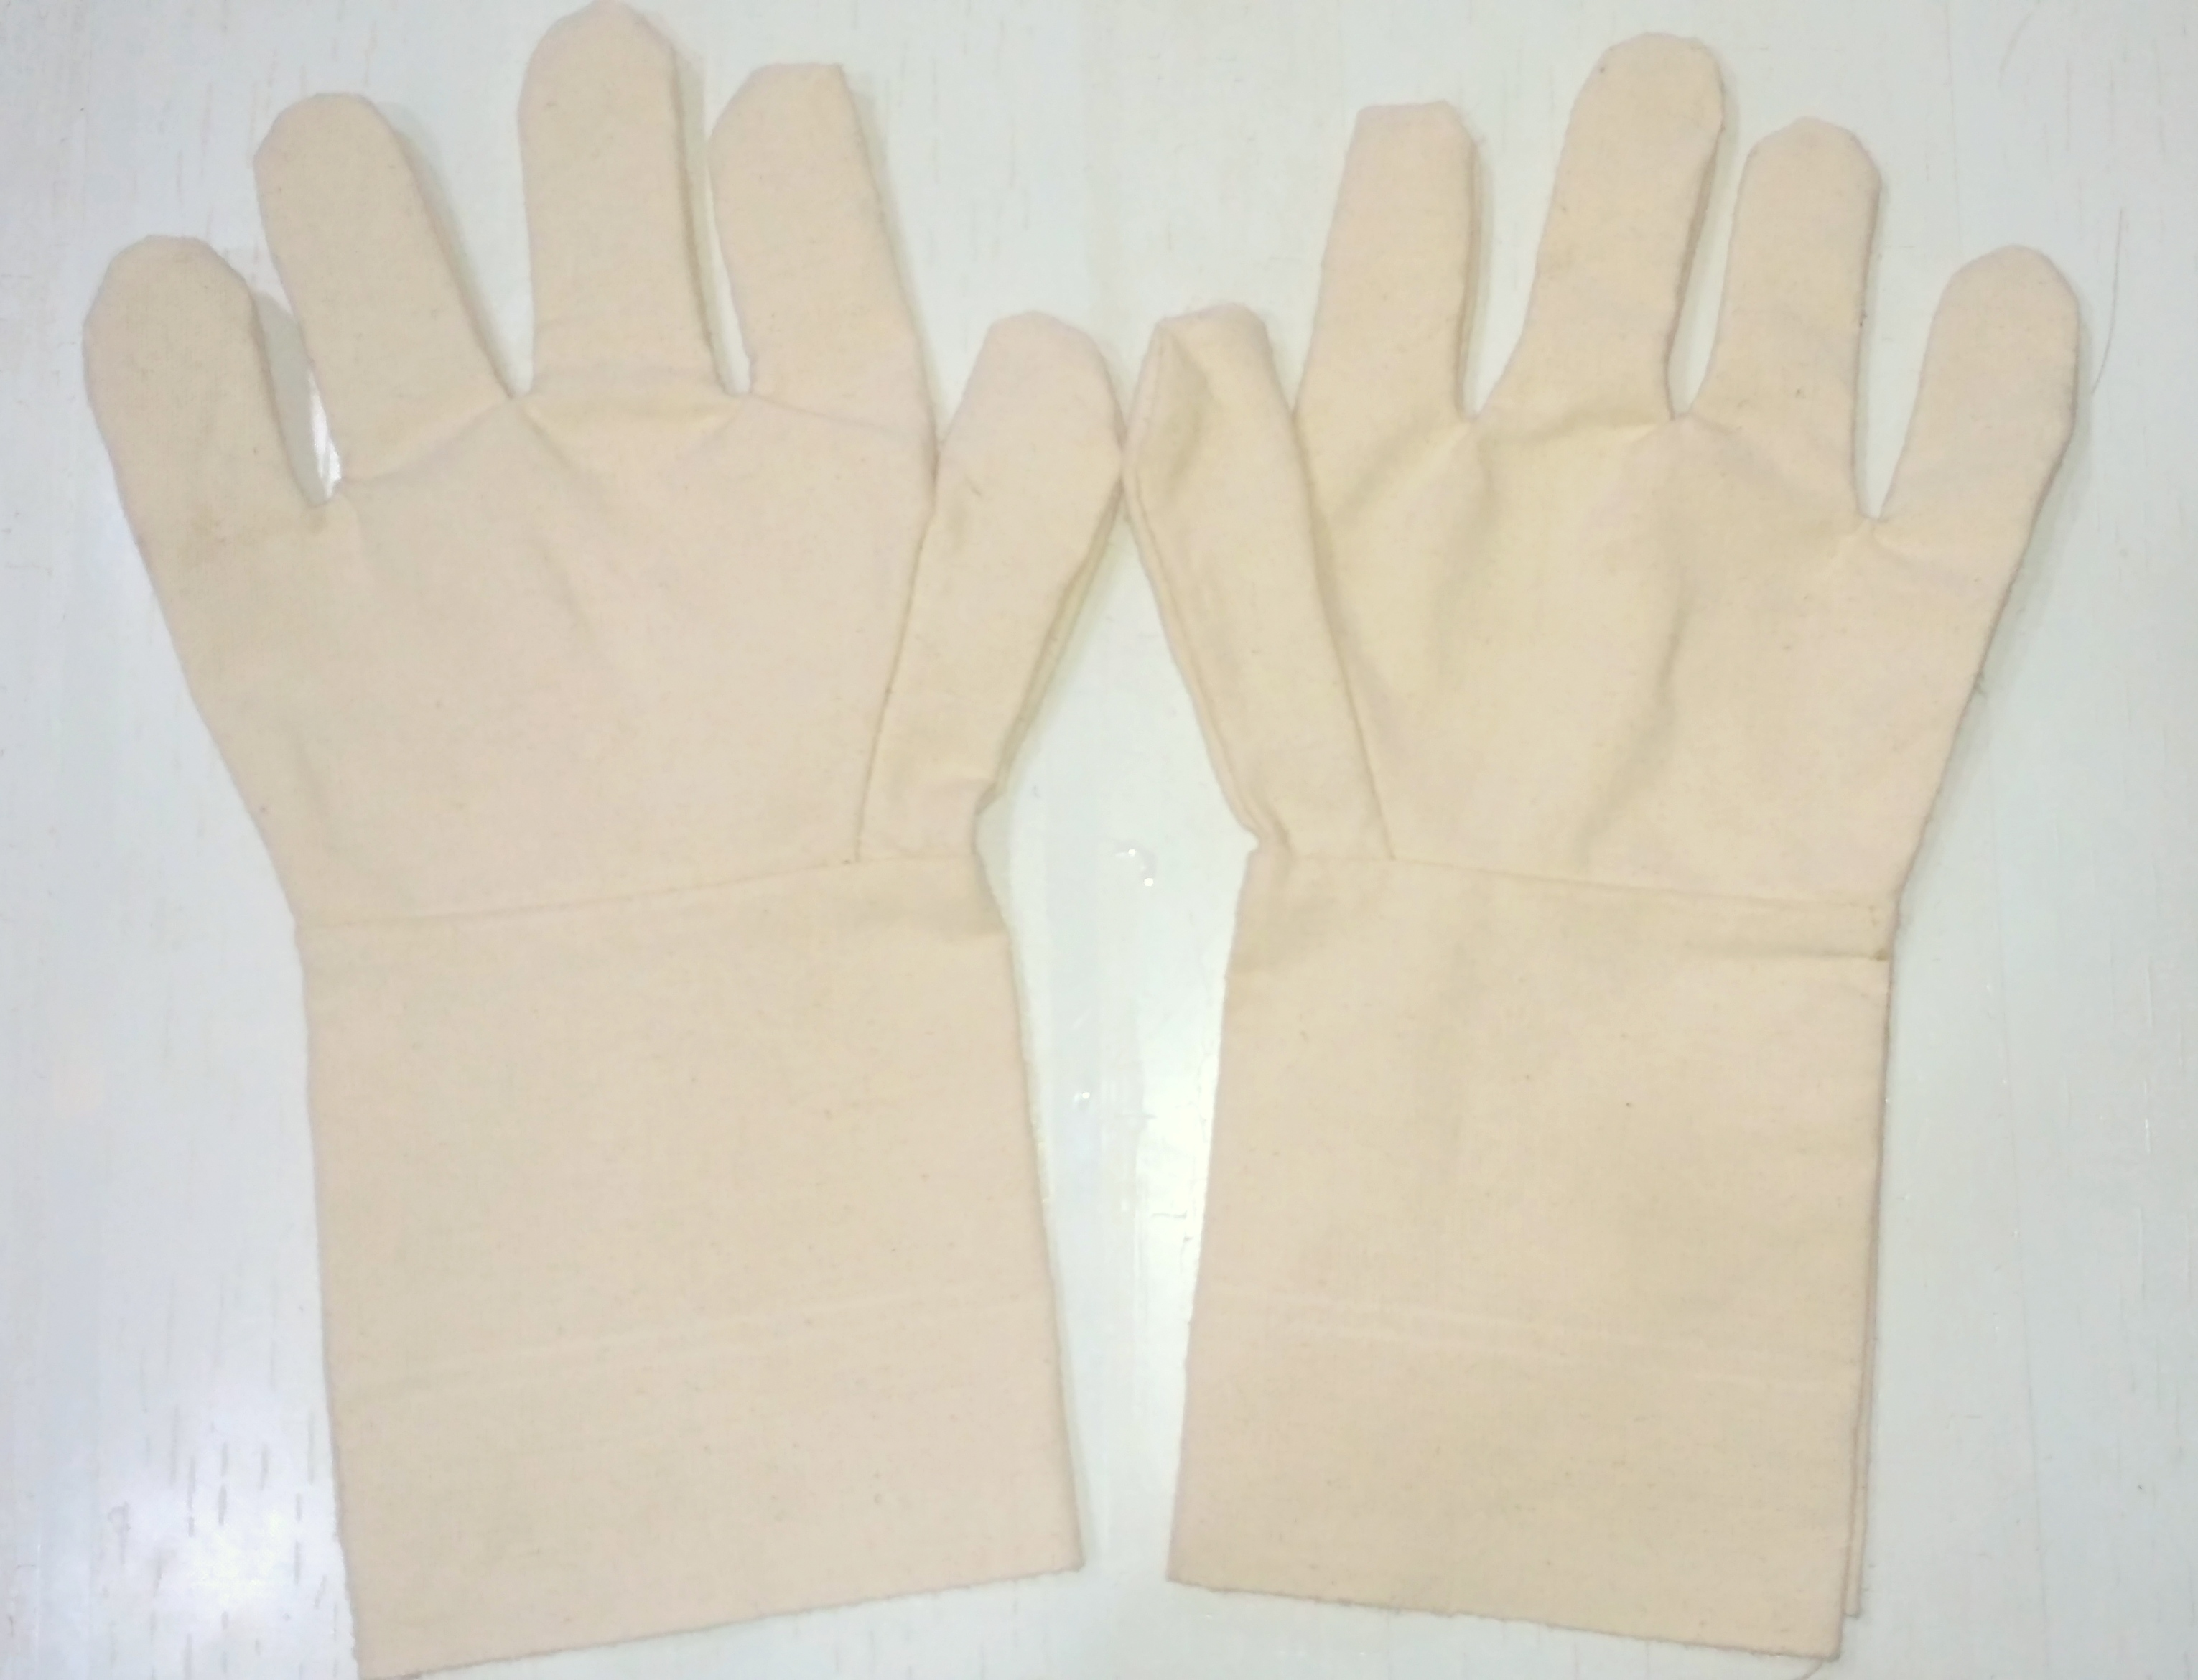

In [62]:
img

In [5]:
data = pd.read_csv('productcatalog.csv')
data.head()

itemid              maincategory                    subcategory  \
0  201624                    Gloves                         Gloves   
1  201626                    Gloves  Gloves,Home Featured,Featured   
2  201627              Hand Sleeves                   Hand Sleeves   
3  201628                 Ear Muffs                      Ear Muffs   
4  201632  Respirator & Accessories       Respirator & Accessories   

             itemcode                     productname productdescription  \
0      N69PC-001-0026  COTTON GLOVES FOR EPOXY (PAIR)                  '   
1      N69PC-001-0007                POLYTHENE GLOVES                NaN   
2      N69EG-019-0014             GELCOAT HAND SLEEVE                NaN   
3  N69PC-001-0005MUFF               3M EAR MUFF 1426                 NaN   
4      N69PC-001-0104         3M? Filter Retainer 501                NaN   

    price  
0   25.00  
1    1.15  
2   15.00  
3  198.00  
4  135.00

In [9]:
data.shape

(3020, 7)

In [6]:
# Ensure column names are consistent and trimmed of leading/trailing spaces
df.columns = df.columns.str.strip()
data.columns = data.columns.str.strip()

SyntaxError: incomplete input (3173925101.py, line 8)

In [7]:
# Perform the mapping
# Map the 'Large Image' from df to 'image_url' in data based on 'Item Code' and 'itemcode'
data['image_url'] = data['itemcode'].map(df.set_index('Item Code')['Large Image'])

In [8]:
data

itemid              maincategory  \
0     201624                    Gloves   
1     201626                    Gloves   
2     201627              Hand Sleeves   
3     201628                 Ear Muffs   
4     201632  Respirator & Accessories   
...      ...                       ...   
3015  205083      Facility Maintenance   
3016  205087        Hand & Power Tools   
3017  205088    Chemicals & Lubricants   
3018  205089      Facility Maintenance   
3019  205091      Facility Maintenance   

                                        subcategory            itemcode  \
0                                            Gloves      N69PC-001-0026   
1                     Gloves,Home Featured,Featured      N69PC-001-0007   
2                                      Hand Sleeves      N69EG-019-0014   
3                                         Ear Muffs  N69PC-001-0005MUFF   
4                          Respirator & Accessories      N69PC-001-0104   
...                                             ...                 ...   
3015    Facility Maintenance,Home,System,menu1,Shop        N37MUCONTR09   
3016      Hand & Power Tools,Home,System,menu1,Shop    N51HARDWRITEM414   
3017  Chemicals & Lubricants,Home,System,menu1,Shop      N35EM-037-0090   
3018    Facility Maintenance,Home,System,menu1,Shop    N31-ANGLECP825CT   
3019    Facility Maintenance,Home,System,menu1,Shop     N31-ANGLECP825C   

                                            productname productdescription  \
0                        COTTON GLOVES FOR EPOXY (PAIR)                  '   
1                                      POLYTHENE GLOVES                NaN   
2                                   GELCOAT HAND SLEEVE                NaN   
3                                     3M EAR MUFF 1426                 NaN   
4                               3M? Filter Retainer 501                NaN   
...                                                 ...                ...   
3015  M12 male / M12 male 90° shielded Cube67 PUR 0....                NaN   
3016                             TOOLS TROLLEY 7 DRAWER                NaN   
3017  Pump head assembly Make-Watson Marlow tube wal...                NaN   
3018                CP MAKE 1/4'' ANGLE RATCHET CP825CT                NaN   
3019                 CP MAKE 1/2'' ANGLE RATCHET CP825C                NaN   

         price                                          image_url  
0        25.00                   COTTON_GLOVES_FOR_EPOXY_PAIR.jpg  
1         1.15                             POLYTHENE_GLOVES_1.jpg  
2        15.00                            GELCOAT_HAND_SLEEVE.jpg  
3       198.00                               3M_EAR_MUFF_1426.jpg  
4       135.00                        3M_Filter_Retainer_5011.jpg  
...        ...                                                ...  
3015   5123.00                                        images.jfif  
3016  27429.00                                  tools_trolley.png  
3017  87937.00                    pdm-wmpumps-520re-pumphead.webp  
3018  15488.00                                        images.jpeg  
3019  13888.00  cp824-chicago-pneumatic-1-4-ratchet-wrench-600...  

[3020 rows x 8 columns]

In [9]:
data.to_csv('product_catlog_image_url.csv', index=False)